# REF 2021 Impact Case Studies: Quantitative Analysis

### Authors: Douglas Leasure, Linda Li, Yifan Lu, Melinda Mills, Charlie Rahal, Mark Verhagen, Bo Zhao

#### Please see github.com\OxfordDemSci\ICS_Analysis for more!

##### Last updated: 30/06/2023

----

## Section 0. Pre-amble

Lets first load in all of the libraries which we'll need. These are primarily custom-built helper functions, stored at `./src/analysis/helpers`. As always, most of this is powered by pandas.

In [1]:
import os
import pandas as pd
from helpers.table_helpers import grouper,\
                                  make_topic_table
from helpers.general_helpers import return_paper_level,\
                                    make_keywords,\
                                    make_heat_topics,\
                                    make_inf_var,\
                                    build_paper_panels
from helpers.text_helpers import make_lemmas,\
                                 text_combiner,\
                                 clean_free_text
from helpers.figure_helpers import groupby_plotter,\
                                   heatmap,\
                                   make_hist_by_panel,\
                                   make_word_vis,\
                                   make_keyword_figure,\
                                   make_gpa_vs_environment,\
                                   make_simple_scores_figure,\
                                   score_read_vs_gpa,\
                                   plot_impacttype_vs_uoa,\
                                   draw_brace,\
                                   plot_metrics_all,\
                                   plot_metrics_shape,\
                                   plot_topic_keywords,\
                                   plot_heat_topics,\
                                   plot_gender,\
                                   make_interdisciplinarity,\
                                   plot_funders,\
plot_impact_type_combined

Define some generally useful paths up top:

In [2]:
merge_path = os.path.join(os.getcwd(), '..', '..', 'data', 'merged')
out_path = os.path.join(os.getcwd(), '..', '..', 'data', 'output')
final_path = os.path.join(os.getcwd(), '..', '..', 'data', 'final')
intermed_path = os.path.join(os.getcwd(), '..', '..', 'data', 'intermediate')
score_inf_path = os.path.join(os.getcwd(), '..', '..', 'data', 'score_inference')
support_path = os.path.join(os.getcwd(), '..', '..', 'data', 'support')
figure_path = os.path.join(os.getcwd(), '..', '..', 'figures')
table_path = os.path.join(os.getcwd(), '..', '..', 'tables')
asset_path = os.path.join(os.getcwd(), '..', '..', 'assets')
dim_out = os.path.join(os.getcwd(), '..', '..', 'data', 'dimensions_returns')
df = pd.read_excel(os.path.join(merge_path, 'merged_ref_data_exc_output.xlsx'),
                   index_col=0)
uniq = df.drop_duplicates(subset=['Institution name', 'Unit of assessment number'])
df_wtext = pd.read_pickle(os.path.join(merge_path, 'merged_with_text_features.pkl'))

## Section 1. Deep Descriptives

Lets do some simple environmental descriptive analysis across Panels:

In [3]:
grouper(df, uniq, ['Main panel'], table_path, 'Panel_groupby.csv').set_index('Main panel')

,Number ICS,% Total ICS,FTE,Doctoral Degrees,Total Income (£bn)
Main panel,,,,,
A,1419,22.31,19763.11,46854.13,22.41
B,1268,19.93,17972.29,51859.17,14.34
C,2146,33.74,23292.24,38122.04,3.61
D,1528,24.02,13946.03,22685.49,1.25


Lets do the same exercise, but instead by UoA:

In [4]:
grouper(df, uniq, ['Main panel', 'Unit of assessment name'],
        table_path, 'UOA_groupby.csv').set_index('Main panel')

,Unit of assessment name,Number ICS,% Total ICS,FTE,Doctoral Degrees,Total Income (£bn)
Main panel,,,,,,
A,"Agriculture, Food and Veterinary Sciences",103,1.62,1293.00,2904.16,1.03
A,"Allied Health Professions, Dentistry, Nursing ...",393,6.18,4703.83,9203.27,1.69
A,Biological Sciences,192,3.02,2816.49,9245.30,3.90
A,Clinical Medicine,254,3.99,4878.50,12174.02,9.88
A,"Psychology, Psychiatry and Neuroscience",326,5.12,4039.77,10528.31,2.68
A,"Public Health, Health Services and Primary Care",151,2.37,2031.52,2799.07,3.23
B,Chemistry,113,1.78,1389.02,6687.21,1.55
B,Computer Science and Informatics,271,4.26,2937.61,6517.63,1.35
B,Earth Systems and Environmental Sciences,148,2.33,1771.97,4061.62,1.27


How does GPA vary across SHAPE and STEM disciplines?

STEM ICS GPA mean:  3.17
SHAPE ICS GPA mean:  3.1
Panel C ICS GPA mean:  3.07
Panel D ICS GPA mean:  3.13


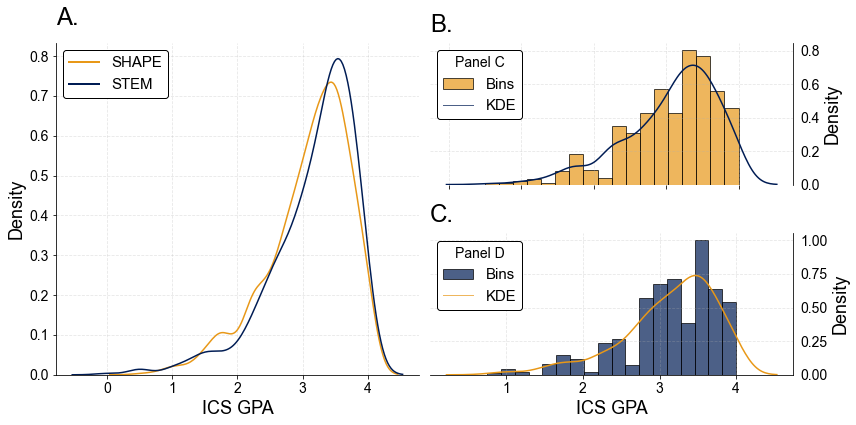

In [5]:
make_simple_scores_figure(df, figure_path, out_path)

How does GPA vary with the envirnonment? In some very, very interesting ways:

Corr(GPA,  FTE) for all ICS is:  0.006
Corr(GPA,  FTE) for STEM is:  0.032
Corr(GPA,  FTE) for SHAPE is:  -0.012
Corr(GPA, Total Income) for all ICS is:  0.033
Corr(GPA, Total Income) for STEM is:  0.074
Corr(GPA, Total Income) for SHAPE is:  0.009
Corr(GPA, Number Degrees) for all ICS is:  0.023
Mean GPA is  3.12
Mean GPA for STEM is  3.168
Mean GPA for SHAPE is  3.1
Mean GPA for STEM (FTE>=100) is  3.558
Mean GPA for SHAPE (FTE>=100) is  3.368
Mean GPA for STEM (50<=FTE) is  3.012
Mean GPA for SHAPE (50<FTE) is  3.051
Mean GPA for STEM (1 ICS submitted) is  3.244
Mean GPA for SHAPE (1 ICS submitted) is  3.04
Mean GPA for STEM (>1 ICS submitted) is  3.166
Mean GPA for SHAPE (>1 ICS submitted) is  3.102


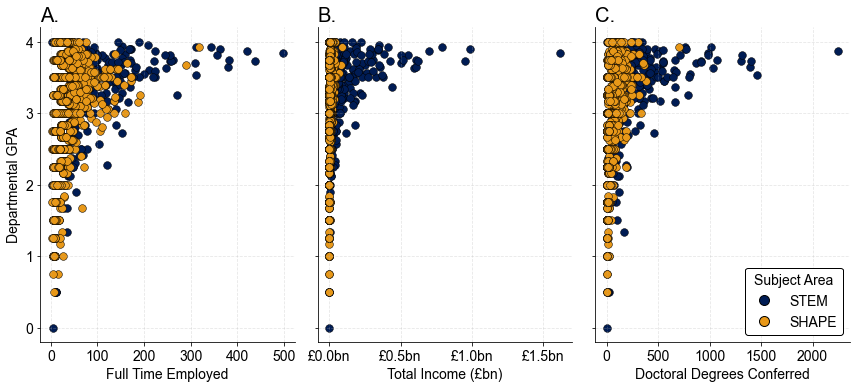

In [6]:
make_gpa_vs_environment(figure_path, df)

More of the same, but this time instead of focusing on the GPA, we focus on the number of ICS submitted

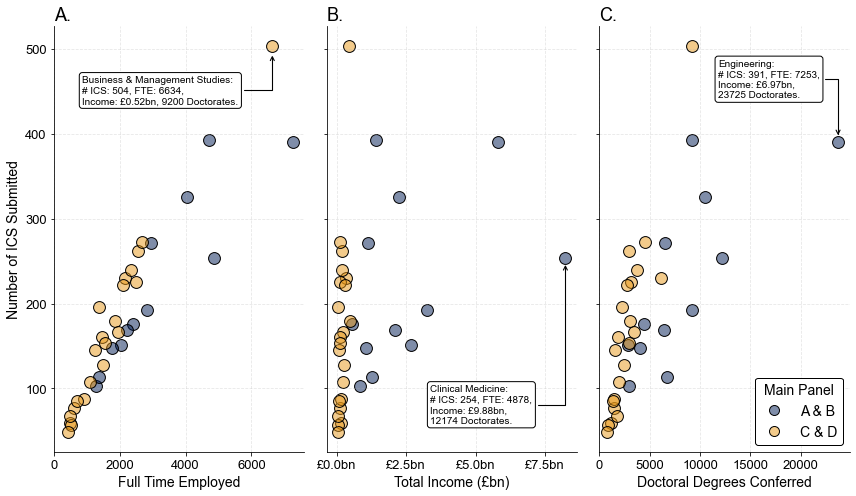

In [7]:
groupby_plotter(grouper(df, uniq, ['Main panel', 'Unit of assessment name'],
                        table_path, 'UOA_groupby.csv'),
                figure_path,'Number_ICS_Submitted')

Is there anything we can say about 'Impact Type' (as ascribed in the raw dataset?)

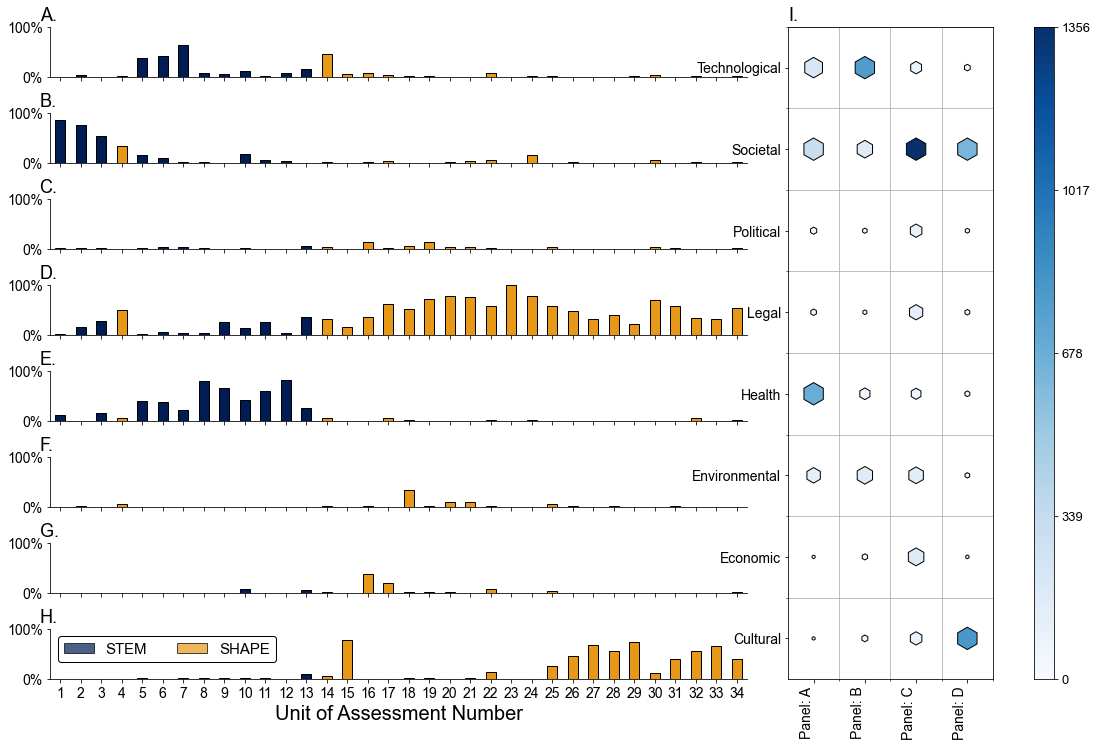

<Figure size 1152x720 with 0 Axes>

In [8]:
plot_impact_type_combined(df, figure_path)

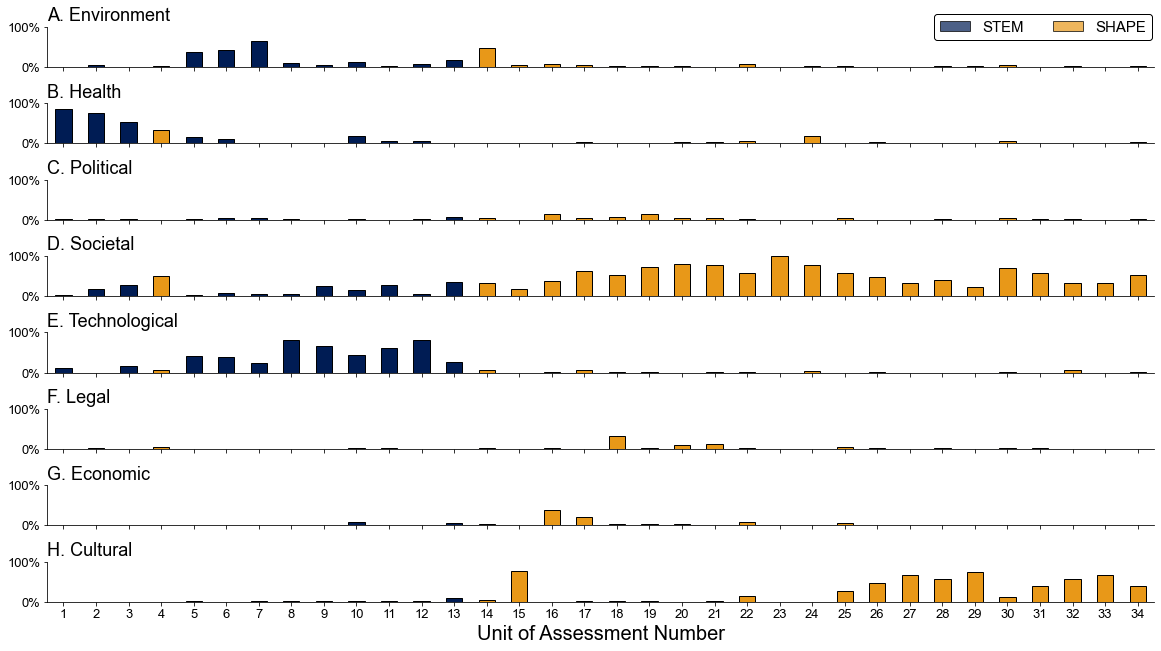

In [9]:
plot_impacttype_vs_uoa(figure_path, df)

## Section 2. Bibliometric Analysis

Lets now turn to some bibliometric data. First, lets look at average times cited and average altmetric scores for all of the 'underlying research' after considering how many of our DOIs and ISBNs actually return matches.

@TODO: We still need to incorporate paper titles into this soup.

In [10]:
paper_level = return_paper_level(dim_out)
paper_panels, cited_by_uoa, altm_by_uoa, ratio_by_uoa = build_paper_panels(paper_level)

We can directly DOI match:  0.617
DOI returns:  10448
We can directly ISBN match:  0.639
ISBN returns:  3216
            Average Times Cited  Average Altmetric  Relative Ratio
Main panel                                                        
A                    138.716981          76.224057        3.906334
B                    119.172932          37.183720        1.251389
C                     43.541823          24.229971        0.261532
D                     11.420320          10.193807        0.053236


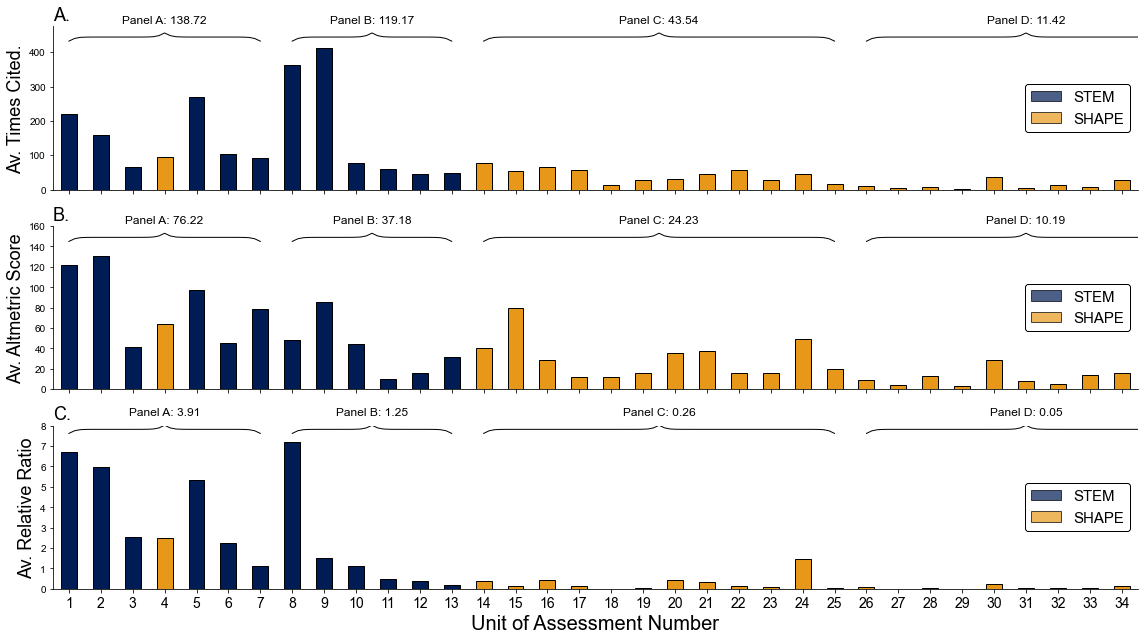

In [11]:
plot_metrics_all(cited_by_uoa, altm_by_uoa, ratio_by_uoa, paper_panels, figure_path)

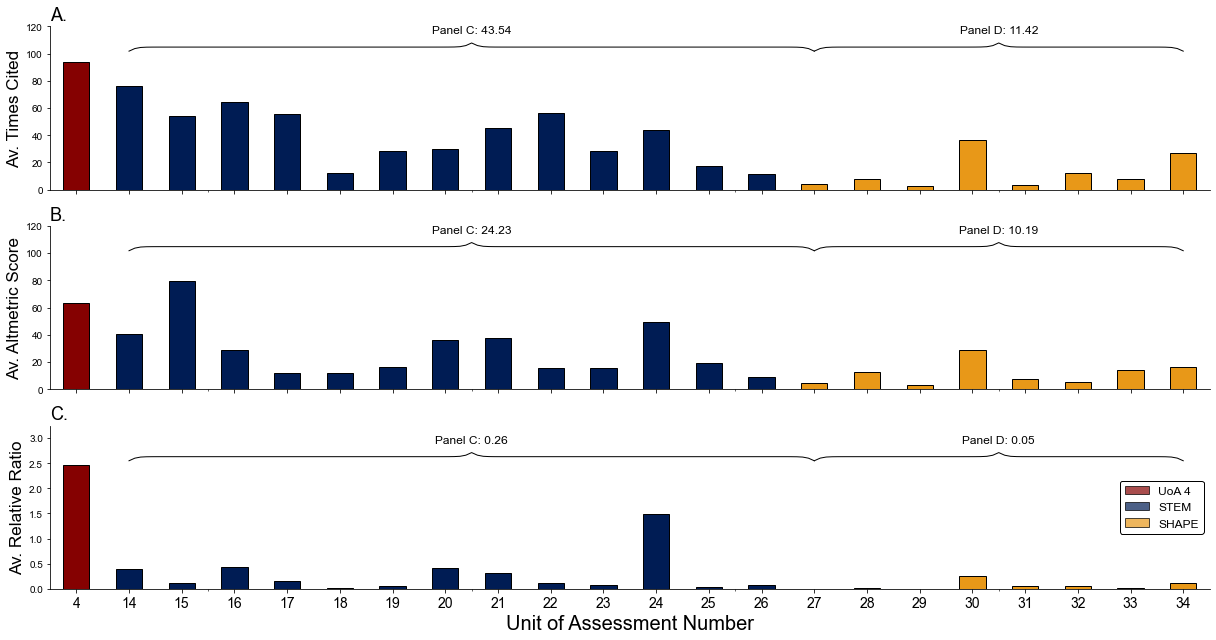

In [12]:
plot_metrics_shape(cited_by_uoa, altm_by_uoa, ratio_by_uoa, paper_panels, figure_path)

Lets now quickly output some bibliometric data to go into the score inference

In [13]:
make_inf_var(paper_level, score_inf_path)

We can directly DOI match:  0.617
DOI returns:  10448
We can directly ISBN match:  0.639
ISBN returns:  3216


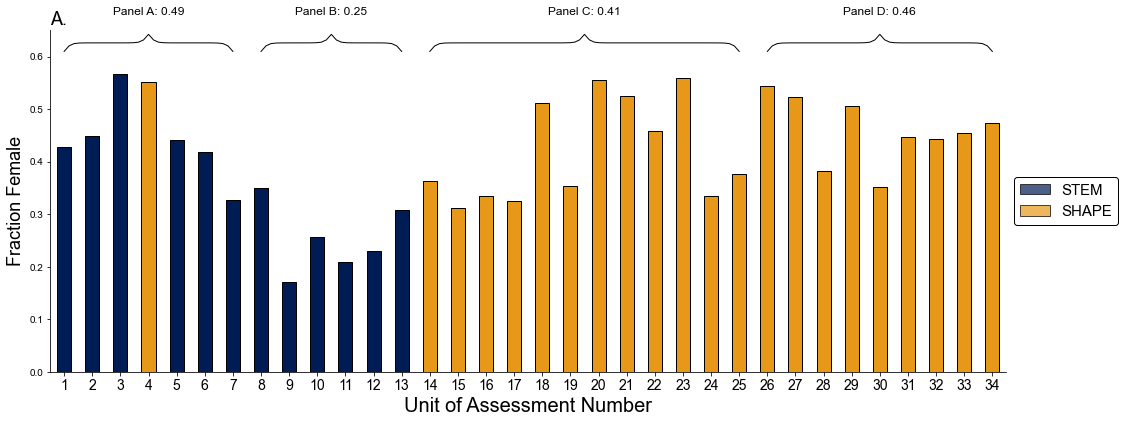

In [14]:
 plot_gender(figure_path)

Interdisciplinarity between underlying research is created below. These are then visualised in R, due to the lack of a better Python equivilent...

![title](interdisciplinarity.png)

In [15]:
make_interdisciplinarity()

We can directly DOI match:  0.617
DOI returns:  10448
We can directly ISBN match:  0.639
ISBN returns:  3216


We can directly DOI match:  0.617
DOI returns:  10448
We can directly ISBN match:  0.639
ISBN returns:  3216
We can directly DOI match:  0.617
DOI returns:  10448
We can directly ISBN match:  0.639
ISBN returns:  3216


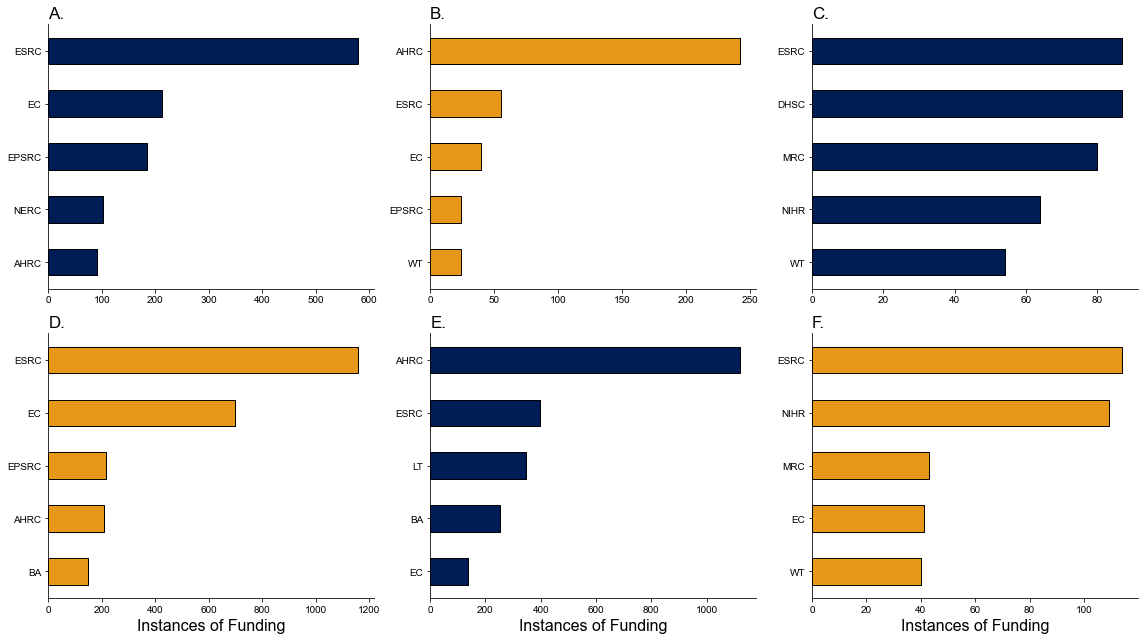

In [16]:
plot_funders()

@TODO a figure to do with funders

## Section 3. NLP analysis

Lets combine the free text field, and then make some lemmas. Note: make_lemmas checks to see if lemmas have already been made, and if they have, loads them in to save time.

In [17]:
df = text_combiner(df)
df = make_lemmas(df, 'Text_Combined', table_path, intermed_path)

Computed lemmas already! Unless nothing substantively changed, lets load them in!


Lets now use these combined, lemmatized words to make our word frequency and co-occurance visualisations!

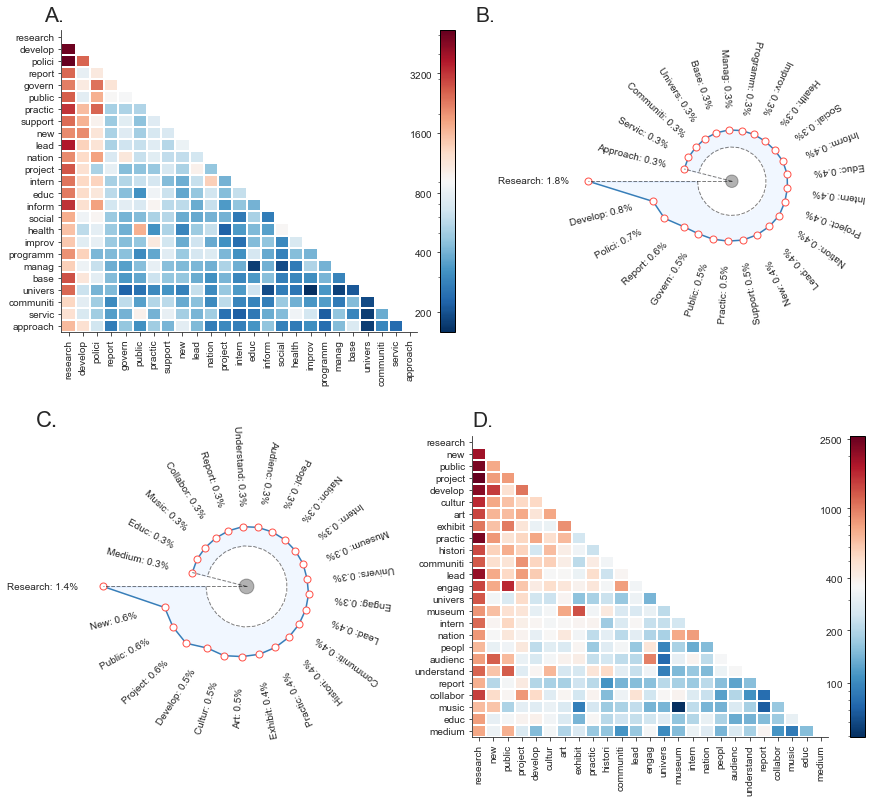

In [18]:
make_word_vis(df[df['Main panel']=='C'], df[df['Main panel']=='D'], 'Text_Combined',
              figure_path, support_path)

What does the distribution of Sentiment Scores look like?

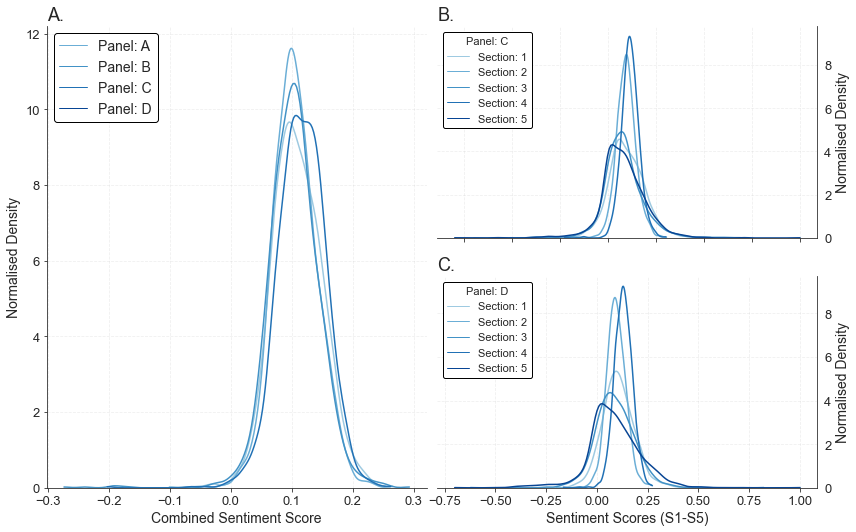

In [19]:
dfe = pd.read_pickle(os.path.join(merge_path, 'merged_with_text_features.pkl'))
make_hist_by_panel(dfe, figure_path, 'sentiment_by_panel', 'sentiment', False)

What does the distribution of Flesch Scores look like?

@TODO: get rid of these awful colours

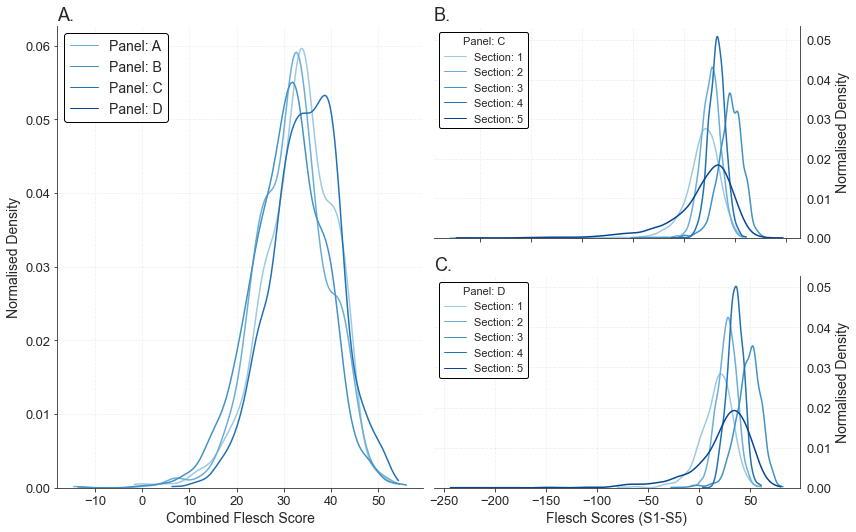

In [20]:
make_hist_by_panel(dfe, figure_path, 'flesch_by_panel', 'flesch', False)

Do Departmental GPAs show any correlation with readability or sentiment?

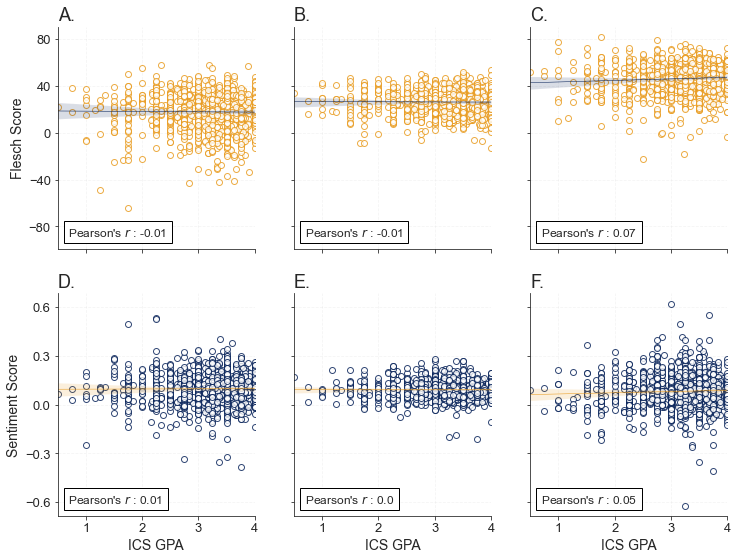

In [21]:
score_read_vs_gpa(merge_path, figure_path)

Lets do some basic analysis of the 'Grand Challenges' via keyword search, first on all ICS:

In [22]:
make_keywords(False)

Number ICS found for Climate &Net Zero:  188
Number ICS found for Data & AI:  28
Number ICS found for Economic &Business:  919
Number ICS found for Health &Wellbeing:  794
Number ICS found for Inequality:  1115
Number ICS found for Innovation:  20


And then on certified 4* ICS:

In [23]:
make_keywords(True)

Number ICS found for Climate &Net Zero:  5
Number ICS found for Data & AI:  1
Number ICS found for Economic &Business:  54
Number ICS found for Health &Wellbeing:  36
Number ICS found for Inequality:  67
Number ICS found for Innovation:  0


Lets make a visualisation of this, without restricting to the ICS being guaranteed four star:

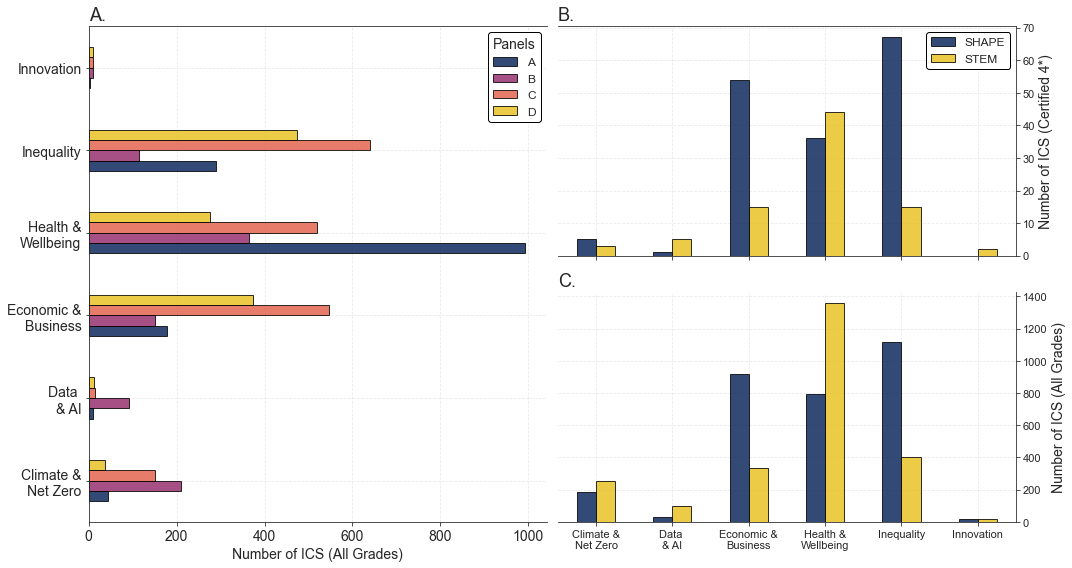

In [24]:
make_keyword_figure()

Lets look at the top keywords across the most frequently seen topics.

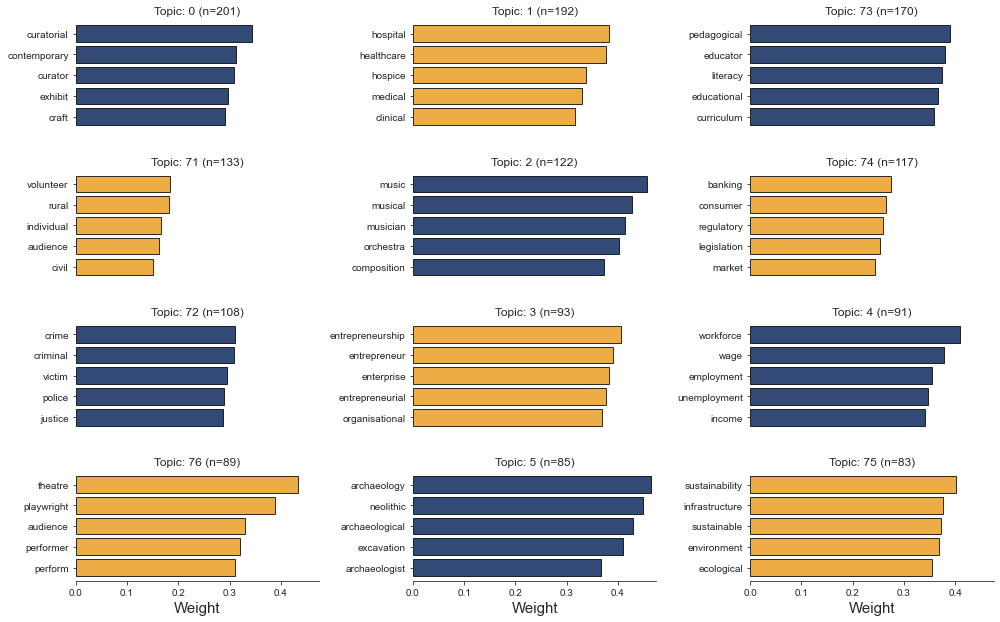

In [25]:
plot_topic_keywords(figure_path)

Lets then look at the table of topics:

In [26]:
make_topic_table(table_path).head(20)

,Top Five Keywords,Count,Panel C (%),Panel D (%),Modal UoA,Modal Institution,Modal Type
Topic Number,,,,,,,
0,"curatorial,contemporary,curator,exhibit,craft,",201,6.47,93.03,32,Queen Mary University of London,Cultural
1,"hospital,healthcare,hospice,medical,clinical,",192,55.73,31.77,17,University College London,Societal
2,"music,musical,musician,orchestra,composition,",122,8.2,90.98,33,Birmingham City University,Cultural
3,"entrepreneurship,entrepreneur,enterprise,entre...",93,91.4,8.6,17,Aston University,Societal
4,"workforce,wage,employment,unemployment,income,",91,93.41,5.49,17,The University of Manchester,Societal
5,"archaeology,neolithic,archaeological,excavatio...",85,35.29,64.71,15,University of Cambridge,Cultural
6,"freshwater,catchment,ecological,ecosystem,grou...",64,89.06,9.38,14,The University of Hull,Environmental
7,"poet,poetry,literature,writer,poem,",66,0.0,100.0,27,University of Oxford,Cultural
8,"athlete,sport,compete,paralympic,elite,",65,84.62,9.23,24,Bournemouth University,Societal


And the topic heatmap:

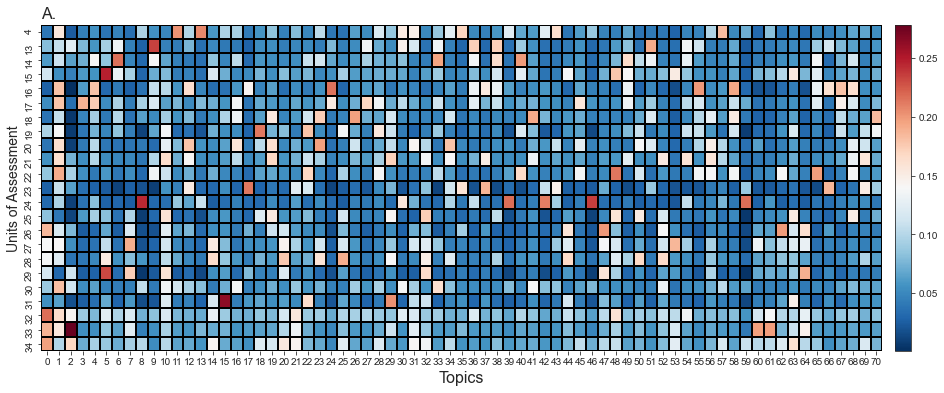

In [27]:
heat_topics, uoa_count = make_heat_topics()
plot_heat_topics(heat_topics, uoa_count, figure_path)